In [583]:
#First step Explore Data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
#pross data
data=pd.read_csv("BikeSharingAssignment.csv")
print("——————————————————————————")
print("first 3 ")
display(data.head(3))
print("——————————————————————————")
print("last 3")
display(data.tail(3))
print("——————————————————————————")
print("count of the tabel for col and row")
display(data.shape)
print("——————————————————————————")
print("type of data")
display(data.info())
print("——————————————————————————")
print("describe the data")
display(data.describe())

——————————————————————————
first 3 


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


——————————————————————————
last 3


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


——————————————————————————
count of the tabel for col and row


(10886, 12)

——————————————————————————
type of data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


None

——————————————————————————
describe the data


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [584]:
# second step is Preprocess Data
data.isnull().sum()


datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

لقد تحققنا وبالفعل لا يوجد لدينا أي عمود يحتوي على معلومات ناقصة. 


In [585]:
data.duplicated().sum()

0

لقد تحققنا وبالفعل لا يوجد لدينا أي عمود يحتوي على معلومات متكررة. 


In [586]:
data.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [587]:
data.dtypes
data.dtypes =="object"

datetime       True
season        False
holiday       False
workingday    False
weather       False
temp          False
atemp         False
humidity      False
windspeed     False
casual        False
registered    False
count         False
dtype: bool

In [588]:
strings = list(data.dtypes[data.dtypes == 'object'].index)
strings

['datetime']

In [589]:
# Ensure 'datetime' column is present and convert it to datetime
data['datetime'] = pd.to_datetime(data['datetime'])
data['year'] = data['datetime'].dt.year
data['month'] = data['datetime'].dt.month
data["workingday"] = data["workingday"].astype("category")
data["holiday"] = data["holiday"].astype("category")
data["season"] = data["season"].astype("category")
data.drop(columns=['datetime'], inplace=True)

data

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1
1,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1
2,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1
3,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1
4,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12
10882,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12
10883,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12
10884,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12


In [590]:
for col in data.columns:
    print(col)
    print(data[col].head())
    print()

season
0    1
1    1
2    1
3    1
4    1
Name: season, dtype: category
Categories (4, int64): [1, 2, 3, 4]

holiday
0    0
1    0
2    0
3    0
4    0
Name: holiday, dtype: category
Categories (2, int64): [0, 1]

workingday
0    0
1    0
2    0
3    0
4    0
Name: workingday, dtype: category
Categories (2, int64): [0, 1]

weather
0    1
1    1
2    1
3    1
4    1
Name: weather, dtype: int64

temp
0    9.84
1    9.02
2    9.02
3    9.84
4    9.84
Name: temp, dtype: float64

atemp
0    14.395
1    13.635
2    13.635
3    14.395
4    14.395
Name: atemp, dtype: float64

humidity
0    81
1    80
2    80
3    75
4    75
Name: humidity, dtype: int64

windspeed
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: windspeed, dtype: float64

casual
0    3
1    8
2    5
3    3
4    0
Name: casual, dtype: int64

registered
0    13
1    32
2    27
3    10
4     1
Name: registered, dtype: int64

count
0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

year
0    2011
1    2011
2    20

In [591]:
for col in data.columns:
    print(col)
    # print only the first 5 values
    # print(data[col].unique()[:5])
    print(data[col].unique())
    print("number of unique values: ",data[col].nunique())
    print()

season
[1, 2, 3, 4]
Categories (4, int64): [1, 2, 3, 4]
number of unique values:  4

holiday
[0, 1]
Categories (2, int64): [0, 1]
number of unique values:  2

workingday
[0, 1]
Categories (2, int64): [0, 1]
number of unique values:  2

weather
[1 2 3 4]
number of unique values:  4

temp
[ 9.84  9.02  8.2  13.12 15.58 14.76 17.22 18.86 18.04 16.4  13.94 12.3
 10.66  6.56  5.74  7.38  4.92 11.48  4.1   3.28  2.46 21.32 22.96 23.78
 24.6  19.68 22.14 20.5  27.06 26.24 25.42 27.88 28.7  30.34 31.16 29.52
 33.62 35.26 36.9  32.8  31.98 34.44 36.08 37.72 38.54  1.64  0.82 39.36
 41.  ]
number of unique values:  49

atemp
[14.395 13.635 12.88  17.425 19.695 16.665 21.21  22.725 21.97  20.455
 11.365 10.605  9.85   8.335  6.82   5.305  6.06   9.09  12.12   7.575
 15.91   3.03   3.79   4.545 15.15  18.18  25.    26.515 27.275 29.545
 23.485 25.76  31.06  30.305 24.24  18.94  31.82  32.575 33.335 28.79
 34.85  35.605 37.12  40.15  41.665 40.91  39.395 34.09  28.03  36.365
 37.88  42.425 43.94  3

c:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
85%        378.000000
90%        452.000000
100%       977.000000
max        977.000000
Name: count, dtype: float64


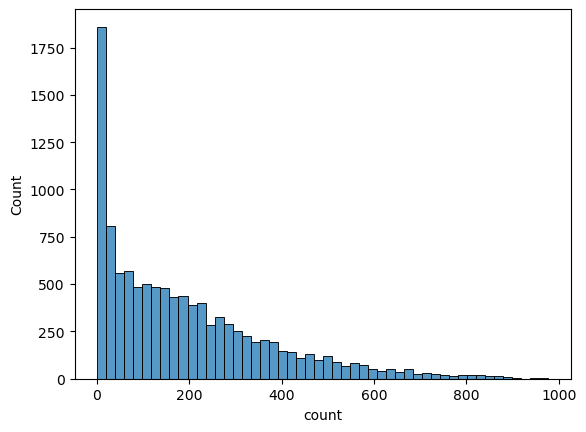

In [592]:
#therd step is EDA
sns.histplot(data['count'],bins=50)
print(data["count"].describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

c:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


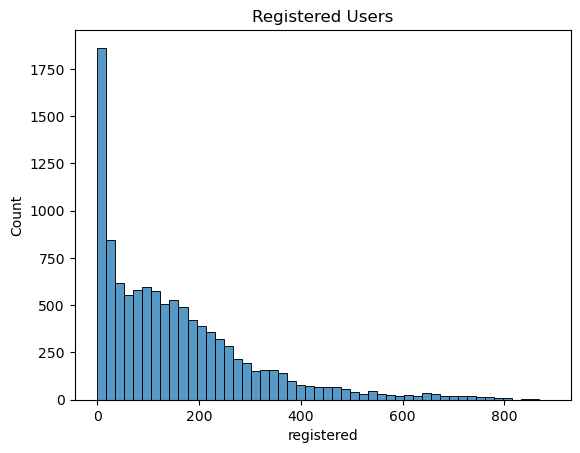

c:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


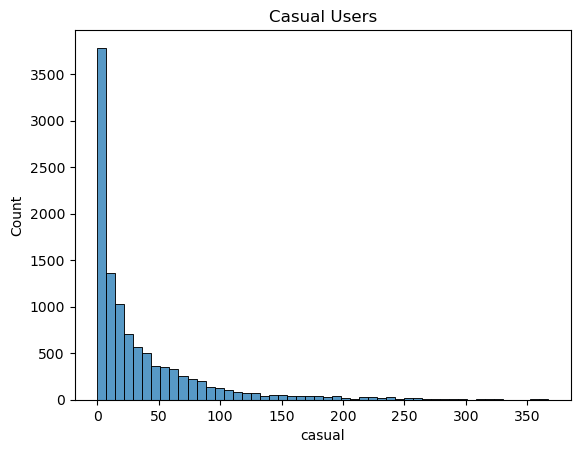

c:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


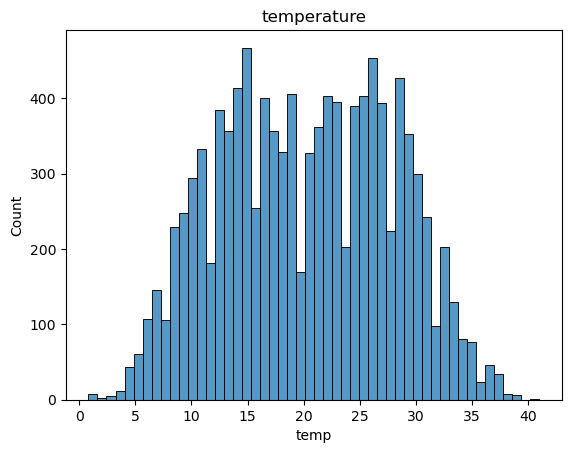

In [593]:
sns.histplot(data['registered'],bins=50)
plt.title('Registered Users')
plt.show()
sns.histplot(data['casual'],bins=50)
plt.title('Casual Users')
plt.show()
sns.histplot(data['temp'],bins=50)
plt.title('temperature')
plt.show()

c:\Anaconda\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


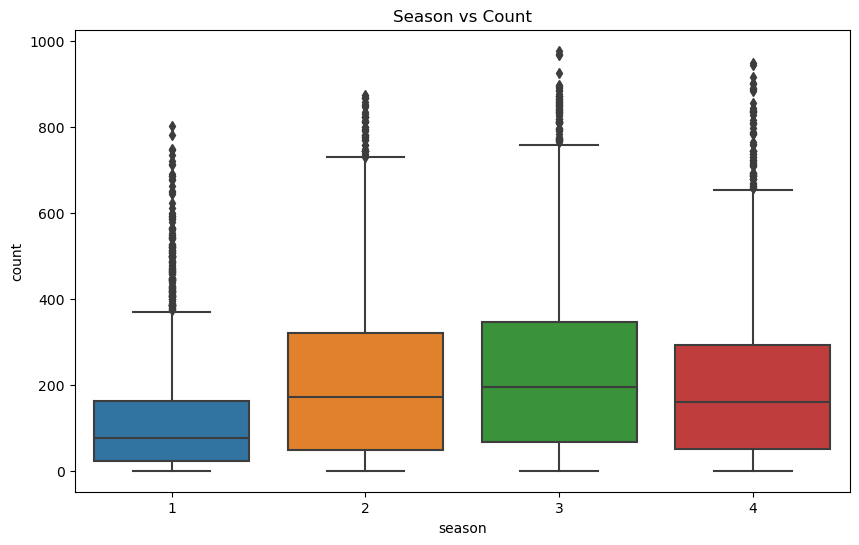

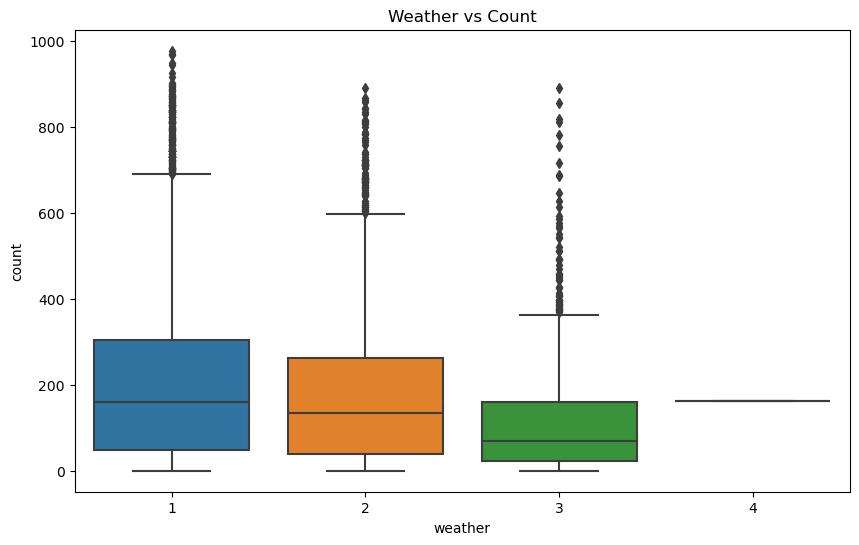

c:\Anaconda\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Figure size 1000x600 with 0 Axes>

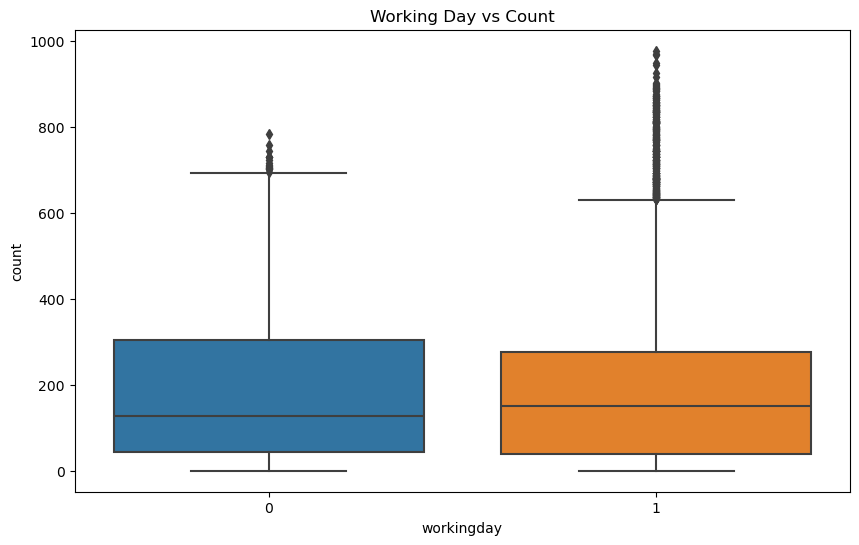

c:\Anaconda\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


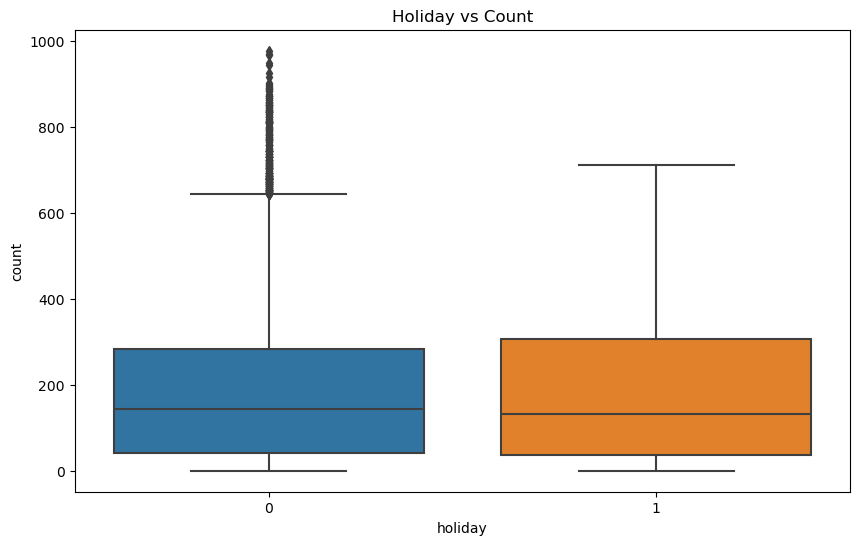

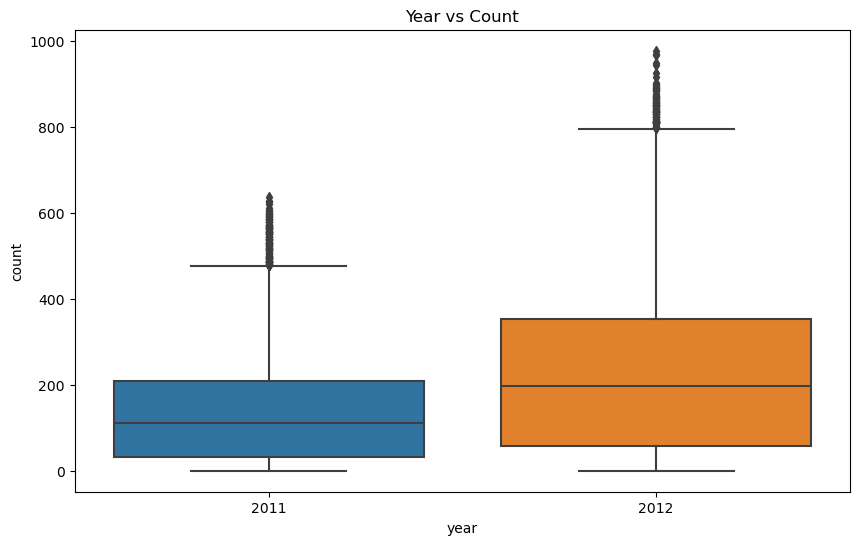

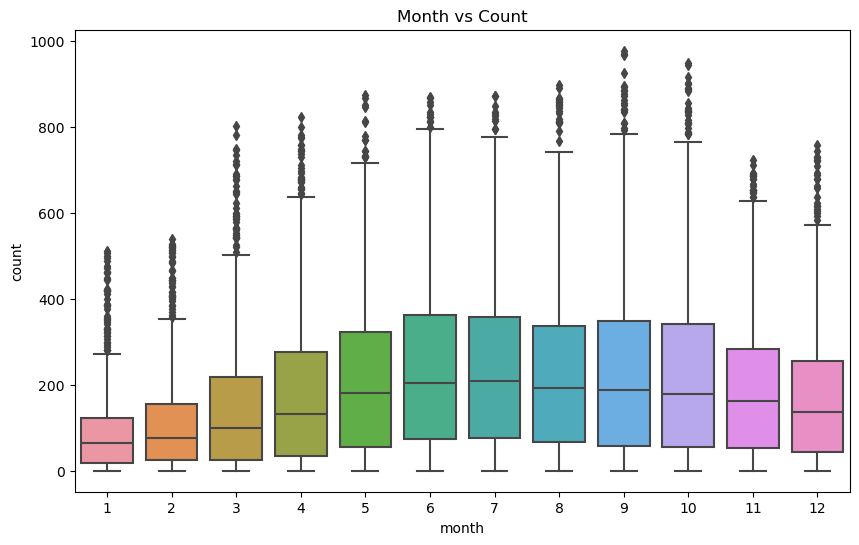

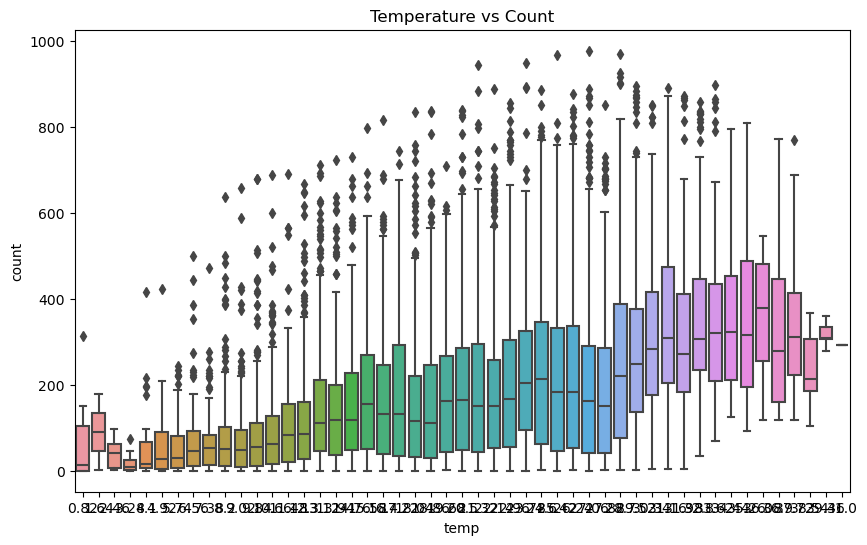

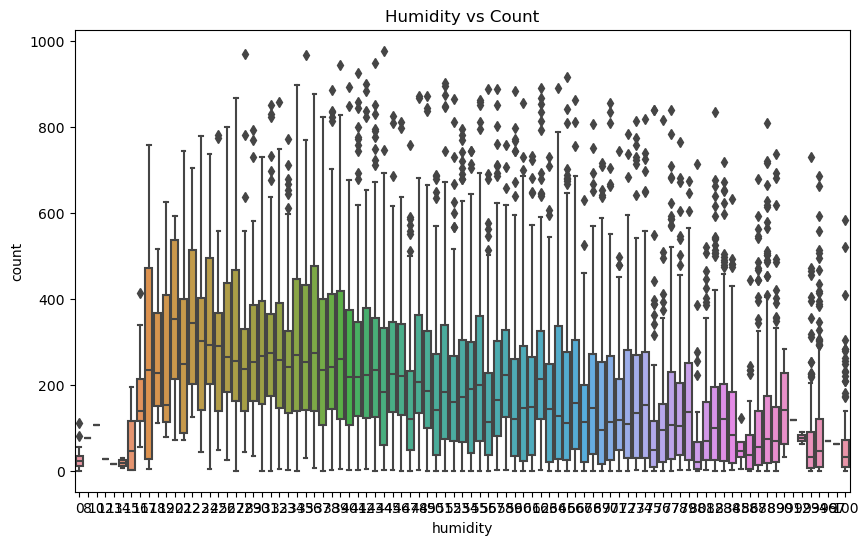

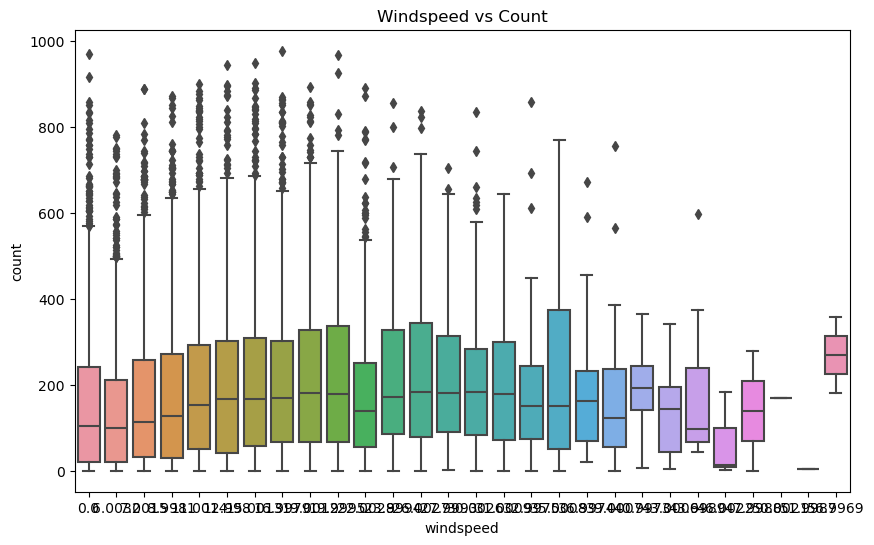

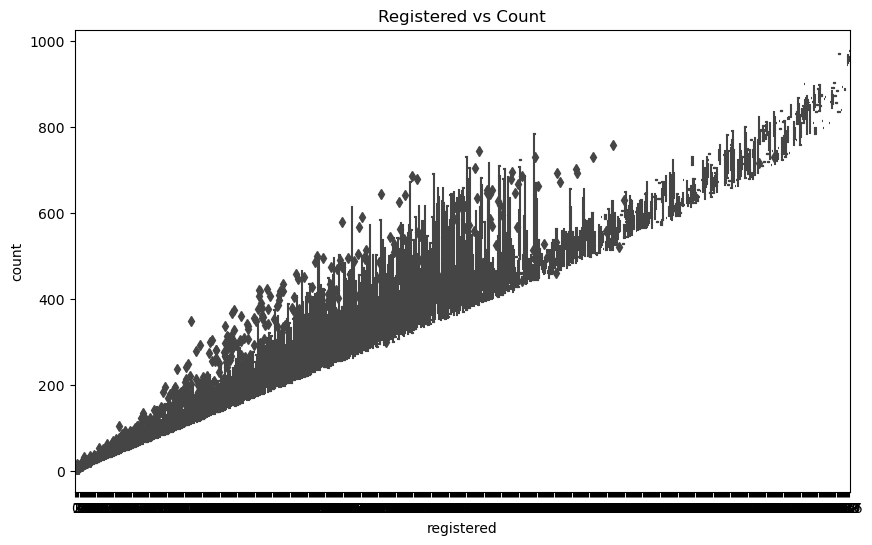

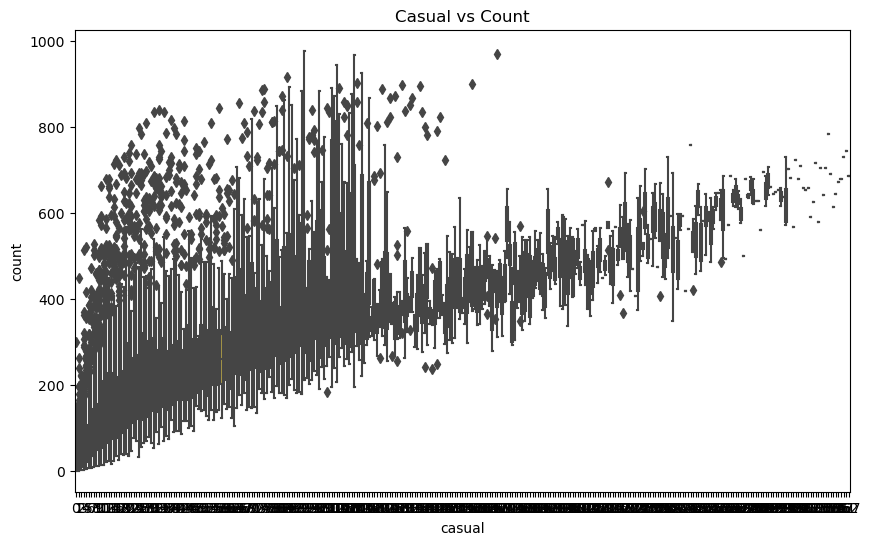

In [594]:
plt.figure(figsize=(10,6))
sns.boxplot(x='season', y='count', data=data)
plt.title('Season vs Count')
plt.show()
plt.figure(figsize=(10,6))
sns.boxplot(x='weather', y='count', data=data)
plt.title('Weather vs Count')
plt.show()
plt.figure(figsize=(10,6))
plt.figure(figsize=(10,6))
sns.boxplot(x='workingday', y='count', data=data)
plt.title('Working Day vs Count')
plt.show()
plt.figure(figsize=(10,6))
sns.boxplot(x='holiday', y='count', data=data)
plt.title('Holiday vs Count')
plt.show()
plt.figure(figsize=(10,6))
sns.boxplot(x='year', y='count', data=data)
plt.title('Year vs Count')
plt.show()
plt.figure(figsize=(10,6))
sns.boxplot(x='month', y='count', data=data)
plt.title('Month vs Count')
plt.show()
plt.figure(figsize=(10,6))
sns.boxplot(x='temp', y='count', data=data)
plt.title('Temperature vs Count')
plt.show()
plt.figure(figsize=(10,6))
sns.boxplot(x='humidity', y='count', data=data)
plt.title('Humidity vs Count')
plt.show()
plt.figure(figsize=(10,6))
sns.boxplot(x='windspeed', y='count', data=data)
plt.title('Windspeed vs Count')
plt.show()
plt.figure(figsize=(10,6))
sns.boxplot(x='registered', y='count', data=data)
plt.title('Registered vs Count')
plt.show()
plt.figure(figsize=(10,6))
sns.boxplot(x='casual', y='count', data=data)
plt.title('Casual vs Count')
plt.show()





In [595]:
#fourth step is Feature Engineering
data.drop(columns=['windspeed', 'workingday','holiday',], inplace=True)

In [596]:
encded_data = pd.get_dummies(data, columns=['season', 'weather', 'year', 'month','casual','registered','temp','humidity'], drop_first=False)

In [597]:

# Split the data into features (X) and target (y)
from sklearn.preprocessing import MinMaxScaler


X = encded_data.drop(columns=['count'])
y = encded_data['count']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training and testing data prepared.")

Training and testing data prepared.


In [598]:
encded_data = data.copy()
encded_data = pd.get_dummies(encded_data)
print(encded_data)

       weather   temp   atemp  humidity  casual  registered  count  year  \
0            1   9.84  14.395        81       3          13     16  2011   
1            1   9.02  13.635        80       8          32     40  2011   
2            1   9.02  13.635        80       5          27     32  2011   
3            1   9.84  14.395        75       3          10     13  2011   
4            1   9.84  14.395        75       0           1      1  2011   
...        ...    ...     ...       ...     ...         ...    ...   ...   
10881        1  15.58  19.695        50       7         329    336  2012   
10882        1  14.76  17.425        57      10         231    241  2012   
10883        1  13.94  15.910        61       4         164    168  2012   
10884        1  13.94  17.425        61      12         117    129  2012   
10885        1  13.12  16.665        66       4          84     88  2012   

       month  season_1  season_2  season_3  season_4  
0          1      True     False

In [599]:
x_test_scaled = scaler.transform(X_test)
x_train_scaled = scaler.transform(X_train)


In [600]:
#fifth step is Model Selection
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

lasso=Lasso()
lasso.fit(x_train_scaled,y_train)
lasso_pred=lasso.predict(x_test_scaled)
print('R2 Score:',r2_score(y_test,lasso_pred))
print('Mean Squared Error:',np.sqrt(mean_squared_error(y_test,lasso_pred)))
print('Mean Absolute Error:',mean_absolute_error(y_test,lasso_pred))


R2 Score: 0.4531761937641351
Mean Squared Error: 134.34648600503985
Mean Absolute Error: 98.81687651797628


In [601]:
ridge=Ridge()
ridge.fit(x_train_scaled,y_train)
ridge_pred=ridge.predict(x_test_scaled)
print('R2 Score:',r2_score(y_test,ridge_pred))
print('Mean Squared Error:',np.sqrt(mean_squared_error(y_test,ridge_pred)))
print('Mean Absolute Error:',mean_absolute_error(y_test,ridge_pred))

R2 Score: 0.9241409349831848
Mean Squared Error: 50.038737931643084
Mean Absolute Error: 22.045397666559612


c:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


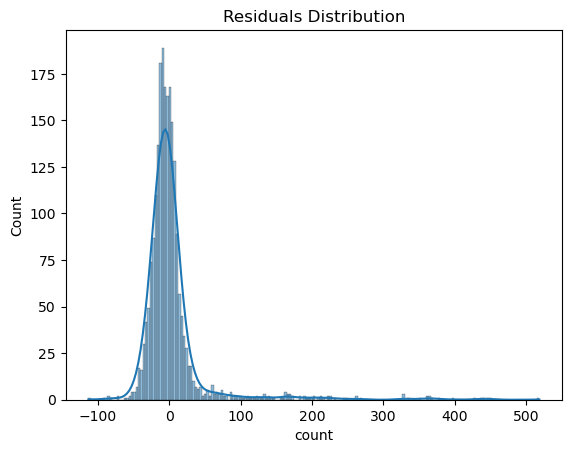

In [609]:
residuals = y_test - ridge_pred
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.show()

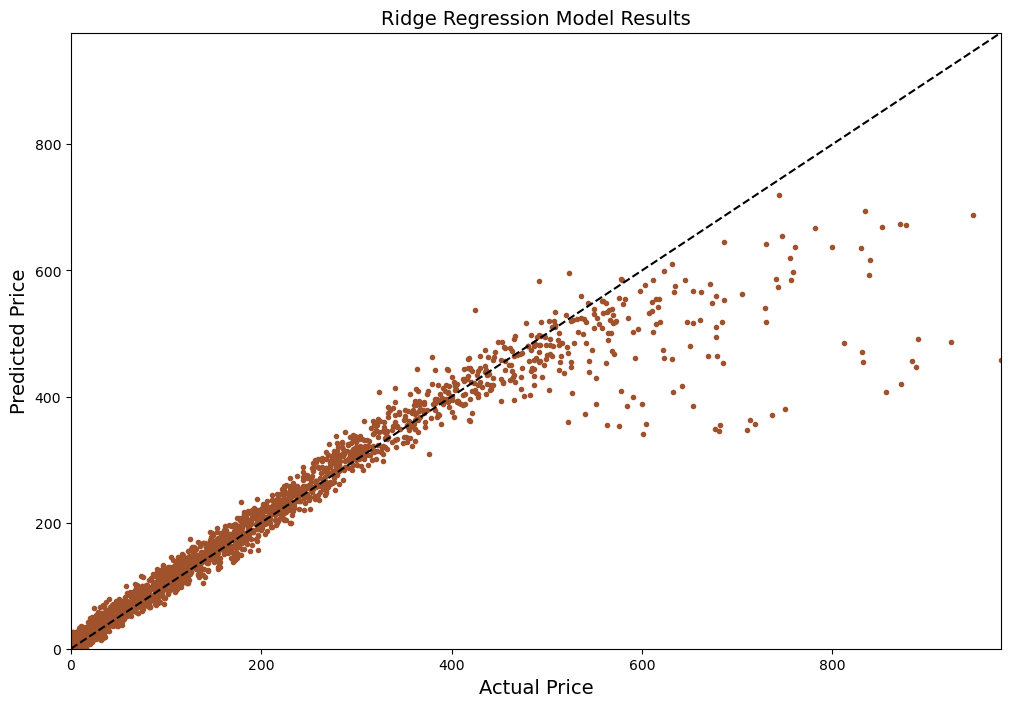

In [602]:
figure = plt.figure(figsize=(12,8))


ax = plt.axes()
ax.plot(y_test, ridge_pred,
         marker='o', ls='', ms=3.0,color='sienna')
lim = (0, y_test.max())
ax.set(xlabel='Actual Price',
       ylabel='Predicted Price',
       xlim=lim,
       ylim=lim)
ax.plot(lim, lim, color='black', linestyle='--')
plt.title('Ridge Regression Model Results', fontsize=14)

ax.xaxis.label.set_size(14)
ax.yaxis.label.set_size(14)
plt.show()


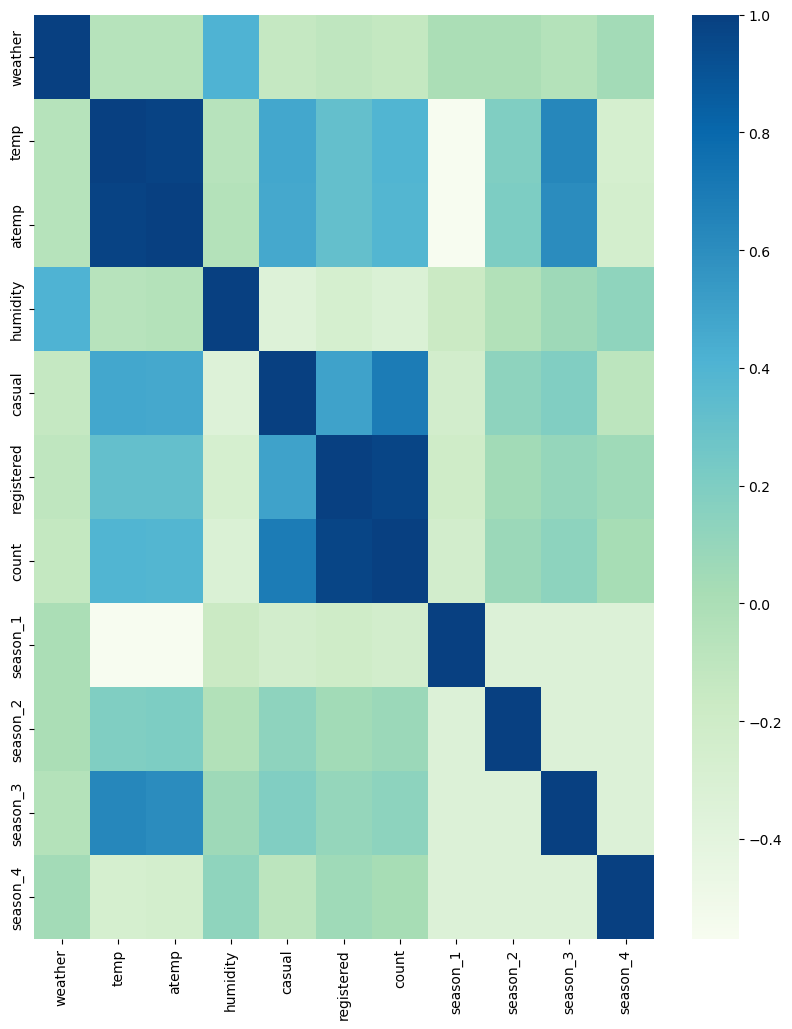

In [612]:
# Exclude datetime columns from correlation calculation
datetime_columns = ['datetime', 'year', 'month']
existing_columns = [col for col in datetime_columns if col in encded_data.columns]
corr = encded_data.drop(columns=existing_columns).corr()
plt.figure(figsize=(10,12))
sns.heatmap(corr, annot=False, cmap="GnBu")
plt.show()


In [613]:
corr['count'].sort_values(ascending=False)[1:6]


registered    0.970948
casual        0.690414
temp          0.394454
atemp         0.389784
season_3      0.136942
Name: count, dtype: float64